In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
from scipy import stats

In [2]:
def construct_path(mgrs: str, year: int):
    filename = 'Sentinel_width_' + str(year) + '_' + mgrs + '.csv'
    path = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/' + filename
    return(path)

In [3]:
YEARS = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
TILES = ['14TPL', '14TPM', '14TNL']

In [4]:
FILEPATH = construct_path('14TPL', 2016)
df = pd.DataFrame()


for y in YEARS:
    for t in TILES:
        FILEPATH = construct_path(t, y)
        if os.path.exists(FILEPATH):
            print(FILEPATH)
            df_temp = pd.read_csv(FILEPATH)
            # print(df_temp.nunique()['image_id'])
            if y == 2016 and t == '14TPL':
                df = df_temp
            else:
                df = pd.concat([df, df_temp])

C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2016_14TPL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2016_14TPM.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2016_14TNL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2017_14TPL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2017_14TPM.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2017_14TNL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2018_14TPL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2018_14TPM.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2018_14TNL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_ST_platte_2024/Sentinel_width_2019_14TPL.csv
C:/Users/dego/OneDrive - Virginia Tech/RSSA/width_

In [8]:
def remove_oper(row):
    imageid = row['image_id']
    components = imageid.split('_')
    if components[1] == 'OPER':
        return(True)
    else:
        return(False)
    
def add_dt(row):
    imageid = row['image_id']
    components = imageid.split('_')
    # if components[1] != 'OPER':
    date_str = components[2].split('T')[0]
    date = datetime.strptime(date_str, '%Y%m%d').date()
    return(date)
    # else:
    #     date_str = components[5].split('T')[0]

def add_sat(row):
    imageid = row['image_id']
    components = imageid.split('_')
    satellite = components[0]
    return(satellite)

def add_mgrs(row):
    imageid = row['image_id']
    components = imageid.split('_')
    tile = components[5]
    return(tile)

df['contains_OPER'] = df.apply(remove_oper, axis=1)
df = df.loc[df['contains_OPER'] == False]
df['datetime'] = df.apply(add_dt, axis=1)
df['satellite'] = df.apply(add_sat, axis=1)
df['mgrs_tile'] = df.apply(add_mgrs, axis=1)

df.head()

,system:index,MERGE_SRC,ModSO,NewSO,SO,crs,endsInWater,endsOverEdge,flag_elevation,flag_hillshadow,...,longitude,orthogonalDirection,width,.geo,flag_cirrus,flag_cloud,contains_OPER,datetime,satellite,mgrs_tile
19846,20160129T172552_20160129T172550_T14TPL_0,NK14_w_image_Project,11,12,11,EPSG:32614,0,0,399.817595,0.0,...,-96.899069,4.354596,0.0,"{""type"":""Point"",""coordinates"":[-96.89906882552...",NaN,NaN,False,2016-01-29,S2A,T14TPL
19847,20160129T172552_20160129T172550_T14TPL_1,NK14_w_image_Project,11,12,11,EPSG:32614,0,0,399.679969,0.0,...,-96.898979,4.354596,0.0,"{""type"":""Point"",""coordinates"":[-96.89897899399...",NaN,NaN,False,2016-01-29,S2A,T14TPL
19848,20160129T172552_20160129T172550_T14TPL_2,NK14_w_image_Project,11,12,11,EPSG:32614,0,0,399.661904,0.0,...,-96.898889,4.354596,0.0,"{""type"":""Point"",""coordinates"":[-96.89888916246...",NaN,NaN,False,2016-01-29,S2A,T14TPL
19849,20160129T172552_20160129T172550_T14TPL_3,NK14_w_image_Project,11,12,11,EPSG:32614,0,0,399.822862,0.0,...,-96.898799,4.249877,0.0,"{""type"":""Point"",""coordinates"":[-96.89879933094...",NaN,NaN,False,2016-01-29,S2A,T14TPL
19850,20160129T172552_20160129T172550_T14TPL_4,NK14_w_image_Project,11,12,11,EPSG:32614,0,0,399.799481,0.0,...,-96.898709,4.249877,0.0,"{""type"":""Point"",""coordinates"":[-96.89870949941...",NaN,NaN,False,2016-01-29,S2A,T14TPL


In [9]:
# df.to_csv('C:/Users/dego/OneDrive - Virginia Tech/RSSA/platte_stats.csv')

In [10]:
# df = pd.read_csv('C:/Users/dego/OneDrive - Virginia Tech/RSSA/platte_stats.csv')

In [11]:

widths = df['width']
num_total_widths = len(widths)

filtered_df = df.loc[(df['width'] != -999) & (df['endsInWater'] == 0) & (df['endsOverEdge'] == 0)]
filtered_widths = filtered_df['width']
num_filtered_widths = len(filtered_widths)

o11_df = filtered_df.loc[(filtered_df['SO'] == 11)]
o11_widths = o11_df['width']
num_o11_widths = len(o11_widths)

o10_df = filtered_df.loc[(filtered_df['SO'] == 10)]
o10_widths = o10_df['width']
num_o10_widths = len(o10_widths)

o9_df = filtered_df.loc[(filtered_df['SO'] == 9)]
o9_widths = o9_df['width']
num_o9_widths = len(o9_widths)

o8_df = filtered_df.loc[(filtered_df['SO'] == 8)]
o8_widths = o8_df['width']
num_o8_widths = len(o8_widths)

18864212
17119331
0.0
nan
0.0
0.0


In [14]:
unique_imgs = df['image_id'].unique().tolist()
print(len(unique_imgs))

595


In [16]:
def aggregate_temporal_width_stats(wholedf):
    unique_dates = df['datetime'].drop_duplicates().sort_values().tolist()
    width_mean = []
    width_median = []
    width_stdev = []
    width_iqr = []
    width_max = []
    width_min = []
    wet_only_width_mean = []
    wet_only_width_median = []
    wet_only_width_stdev = []
    wet_only_width_iqr = []
    wet_only_width_max = []
    wet_only_width_min = []
    num_widths = []
    num_wet_widths = []
    wet_fraction = []

    for d in range(len(unique_dates)):
        dt = unique_dates[d]
        temp_df = wholedf.loc[wholedf['datetime'] == dt]
        
        wet_only_temp_df = temp_df.loc[(temp_df['width'] != 0)]

        width_mean.append(temp_df['width'].mean())
        width_median.append(temp_df['width'].median())
        width_stdev.append(temp_df['width'].std())
        width_max.append(temp_df['width'].max())
        width_min.append(temp_df['width'].min())
        if temp_df['width'].max() > 0:
            q3 = np.percentile(temp_df['width'], 75)
            q1 = np.percentile(temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        width_iqr.append(iqr)

        wet_only_width_mean.append(wet_only_temp_df['width'].mean())
        wet_only_width_median.append(wet_only_temp_df['width'].median())
        wet_only_width_stdev.append(wet_only_temp_df['width'].std())
        wet_only_width_max.append(wet_only_temp_df['width'].max())
        wet_only_width_min.append(wet_only_temp_df['width'].min())
        if wet_only_temp_df['width'].max() > 0:
            q3 = np.percentile(wet_only_temp_df['width'], 75)
            q1 = np.percentile(wet_only_temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        wet_only_width_iqr.append(iqr)

        num_widths.append(len(temp_df))
        num_wet_widths.append(len(wet_only_temp_df))

        wet_fraction.append(len(wet_only_temp_df) / len(temp_df))

    return pd.DataFrame({'datetime': unique_dates,
                            'width_mean': width_mean,
                            'width_median': width_median,
                            'width_stdev': width_stdev,
                            'width_iqr': width_iqr,
                            'wet_only_width_mean': wet_only_width_mean,
                            'wet_only_width_median': wet_only_width_median,
                            'wet_only_width_stdev': wet_only_width_stdev,
                            'wet_only_width_iqr': wet_only_width_iqr,
                            'num_widths': num_widths,
                            'num_wet_widths': num_wet_widths,
                            'wet_fraction': wet_fraction})



def aggregate_year_width_stats(wholedf):
    years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

    width_mean = []
    width_median = []
    width_stdev = []
    width_iqr = []
    width_max = []
    width_min = []
    wet_only_width_mean = []
    wet_only_width_median = []
    wet_only_width_stdev = []
    wet_only_width_iqr = []
    wet_only_width_max = []
    wet_only_width_min = []
    num_widths = []
    num_wet_widths = []
    wet_fraction = []
    false_dates = []
    
    for d in range(len(years)):
        dt = years[d]
        temp_df = wholedf.loc[pd.to_datetime(wholedf['datetime']).dt.year == dt]
        
        wet_only_temp_df = temp_df.loc[(temp_df['width'] != 0)]

        width_mean.append(temp_df['width'].mean())
        width_median.append(temp_df['width'].median())
        width_stdev.append(temp_df['width'].std())
        width_max.append(temp_df['width'].max())
        width_min.append(temp_df['width'].min())
        if temp_df['width'].max() > 0:
            q3 = np.percentile(temp_df['width'], 75)
            q1 = np.percentile(temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        width_iqr.append(iqr)

        wet_only_width_mean.append(wet_only_temp_df['width'].mean())
        wet_only_width_median.append(wet_only_temp_df['width'].median())
        wet_only_width_stdev.append(wet_only_temp_df['width'].std())
        wet_only_width_max.append(wet_only_temp_df['width'].max())
        wet_only_width_min.append(wet_only_temp_df['width'].min())
        if wet_only_temp_df['width'].max() > 0:
            q3 = np.percentile(wet_only_temp_df['width'], 75)
            q1 = np.percentile(wet_only_temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        wet_only_width_iqr.append(iqr)

        num_widths.append(len(temp_df))
        num_wet_widths.append(len(wet_only_temp_df))

        wet_fraction.append(len(wet_only_temp_df) / len(temp_df))

        false_dates.append(pd.to_datetime(str(dt)+'-01-01'))
        
    return pd.DataFrame({'datetime': years,
                         'false_datetime': false_dates,
                            'width_mean': width_mean,
                            'width_median': width_median,
                            'width_stdev': width_stdev,
                            'width_iqr': width_iqr,
                            'wet_only_width_mean': wet_only_width_mean,
                            'wet_only_width_median': wet_only_width_median,
                            'wet_only_width_stdev': wet_only_width_stdev,
                            'wet_only_width_iqr': wet_only_width_iqr,
                            'num_widths': num_widths,
                            'num_wet_widths': num_wet_widths,
                            'wet_fraction': wet_fraction})


def aggregate_month_width_stats(wholedf):
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    width_mean = []
    width_median = []
    width_stdev = []
    width_iqr = []
    width_max = []
    width_min = []
    wet_only_width_mean = []
    wet_only_width_median = []
    wet_only_width_stdev = []
    wet_only_width_iqr = []
    wet_only_width_max = []
    wet_only_width_min = []
    num_widths = []
    num_wet_widths = []
    wet_fraction = []
    false_dates = []
    
    for d in range(len(months)):
        dt = months[d]
        temp_df = wholedf.loc[pd.to_datetime(wholedf['datetime']).dt.month == dt]
        
        wet_only_temp_df = temp_df.loc[(temp_df['width'] != 0)]

        width_mean.append(temp_df['width'].mean())
        width_median.append(temp_df['width'].median())
        width_stdev.append(temp_df['width'].std())
        width_max.append(temp_df['width'].max())
        width_min.append(temp_df['width'].min())
        if temp_df['width'].max() > 0:
            q3 = np.percentile(temp_df['width'], 75)
            q1 = np.percentile(temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        width_iqr.append(iqr)

        wet_only_width_mean.append(wet_only_temp_df['width'].mean())
        wet_only_width_median.append(wet_only_temp_df['width'].median())
        wet_only_width_stdev.append(wet_only_temp_df['width'].std())
        wet_only_width_max.append(wet_only_temp_df['width'].max())
        wet_only_width_min.append(wet_only_temp_df['width'].min())
        if wet_only_temp_df['width'].max() > 0:
            q3 = np.percentile(wet_only_temp_df['width'], 75)
            q1 = np.percentile(wet_only_temp_df['width'], 25)
            iqr = q3 - q1
        else:
            iqr = -999
        wet_only_width_iqr.append(iqr)

        num_widths.append(len(temp_df))
        num_wet_widths.append(len(wet_only_temp_df))

        wet_fraction.append(len(wet_only_temp_df) / len(temp_df))

        false_dates.append(pd.to_datetime('2000-'+str(dt)+'-01'))
        
    return pd.DataFrame({'datetime': months,
                         'false_datetime': false_dates,
                            'width_mean': width_mean,
                            'width_median': width_median,
                            'width_stdev': width_stdev,
                            'width_iqr': width_iqr,
                            'wet_only_width_mean': wet_only_width_mean,
                            'wet_only_width_median': wet_only_width_median,
                            'wet_only_width_stdev': wet_only_width_stdev,
                            'wet_only_width_iqr': wet_only_width_iqr,
                            'num_widths': num_widths,
                            'num_wet_widths': num_wet_widths,
                            'wet_fraction': wet_fraction})

In [17]:
def smooth_months(wholedf):
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

    width_mean = []
    width_median = []
    width_stdev = []
    width_iqr = []
    width_max = []
    width_min = []
    wet_only_width_mean = []
    wet_only_width_median = []
    wet_only_width_stdev = []
    wet_only_width_iqr = []
    wet_only_width_max = []
    wet_only_width_min = []
    num_widths = []
    num_wet_widths = []
    wet_fraction = []
    false_dates = []

    for i in range(len(years)):
        for j in range(len(months)):
            m = months[j]
            y = years[i]
            temp_df = wholedf.loc[(pd.to_datetime(wholedf['datetime']).dt.month == m) & (pd.to_datetime(wholedf['datetime']).dt.year == y)]
            
            wet_only_temp_df = temp_df.loc[(temp_df['width'] != 0)]

            width_mean.append(temp_df['width'].mean())
            width_median.append(temp_df['width'].median())
            width_stdev.append(temp_df['width'].std())
            width_max.append(temp_df['width'].max())
            width_min.append(temp_df['width'].min())
            if temp_df['width'].max() > 0:
                q3 = np.percentile(temp_df['width'], 75)
                q1 = np.percentile(temp_df['width'], 25)
                iqr = q3 - q1
            else:
                iqr = -999
            width_iqr.append(iqr)

            wet_only_width_mean.append(wet_only_temp_df['width'].mean())
            wet_only_width_median.append(wet_only_temp_df['width'].median())
            wet_only_width_stdev.append(wet_only_temp_df['width'].std())
            wet_only_width_max.append(wet_only_temp_df['width'].max())
            wet_only_width_min.append(wet_only_temp_df['width'].min())
            if wet_only_temp_df['width'].max() > 0:
                q3 = np.percentile(wet_only_temp_df['width'], 75)
                q1 = np.percentile(wet_only_temp_df['width'], 25)
                iqr = q3 - q1
            else:
                iqr = -999
            wet_only_width_iqr.append(iqr)

            num_widths.append(len(temp_df))
            num_wet_widths.append(len(wet_only_temp_df))
            if len(temp_df) > 0:
                wet_fraction.append(len(wet_only_temp_df) / len(temp_df))
            else:
                wet_fraction.append(-999)

            false_dates.append(pd.to_datetime(str(y) + '-' + str(m) + '-01'))
            
    return pd.DataFrame({'false_datetime': false_dates,
                    'width_mean': width_mean,
                    'width_median': width_median,
                    'width_stdev': width_stdev,
                    'width_iqr': width_iqr,
                    'wet_only_width_mean': wet_only_width_mean,
                    'wet_only_width_median': wet_only_width_median,
                    'wet_only_width_stdev': wet_only_width_stdev,
                    'wet_only_width_iqr': wet_only_width_iqr,
                    'num_widths': num_widths,
                    'num_wet_widths': num_wet_widths,
                    'wet_fraction': wet_fraction})

In [18]:
year_width_stats = aggregate_year_width_stats(filtered_df.loc[(filtered_df['width'] >= 30) | (filtered_df['width'] == 0)])
year_width_stats = year_width_stats.loc[year_width_stats['width_iqr'] != -999]

In [19]:
month_width_stats = aggregate_month_width_stats(filtered_df.loc[(filtered_df['width'] >= 30) | (filtered_df['width'] == 0)])
month_width_stats = month_width_stats.loc[month_width_stats['width_iqr'] != -999]

In [ ]:
o11_stats = aggregate_temporal_width_stats(o11_df)
o9_stats = aggregate_temporal_width_stats(o9_df)
o8_stats = aggregate_temporal_width_stats(o8_df)

o11_stats = o11_stats.loc[o11_stats['wet_only_width_iqr'] != -999]
o9_stats = o9_stats.loc[o9_stats['wet_only_width_iqr'] != -999]
o8_stats = o8_stats.loc[o8_stats['wet_only_width_iqr'] != -999]

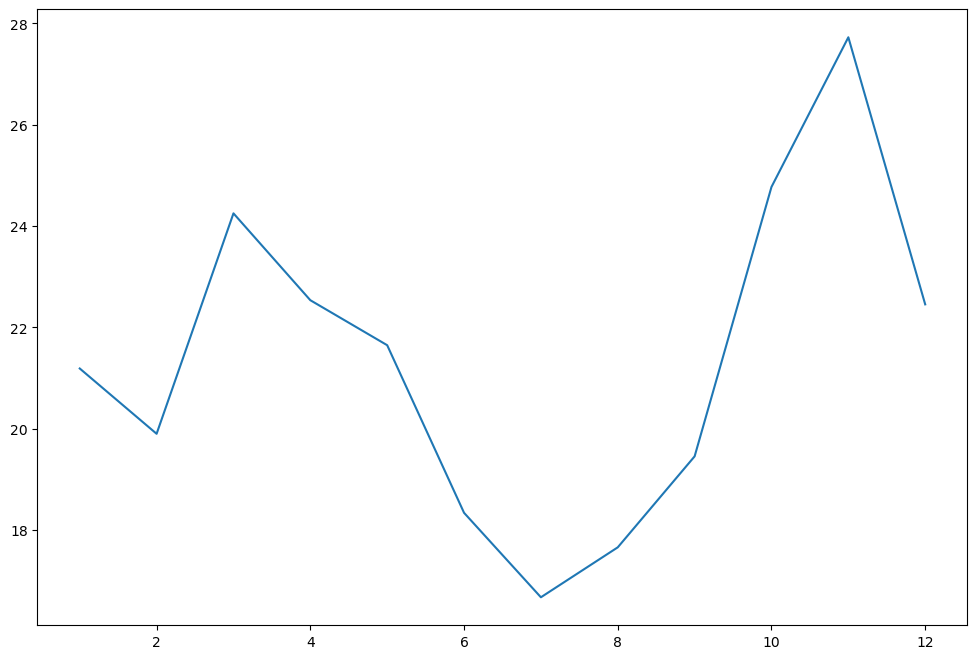

In [146]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(month_width_stats['datetime'], month_width_stats['wet_only_width_iqr'])

In [ ]:
bulk_stats = aggregate_temporal_width_stats(filtered_df.loc[(filtered_df['width'] >= 30) | (filtered_df['width'] == 0)])
bulk_stats = bulk_stats.loc[bulk_stats['width_iqr'] != -999]

In [ ]:

o30_df = filtered_df.loc[(filtered_df['width'] >= 30) | (filtered_df['width'] == 0)]

o30_df['my_str'] = str(pd.to_datetime(o30_df['datetime']).dt.year) + str(pd.to_datetime(o30_df['datetime']).dt.month)

smoothed_months = smooth_months(o30_df)
smoothed_months = smoothed_months.loc[smoothed_months['width_iqr'] != -999]

C:\Users\dego\AppData\Local\Temp\ipykernel_5432\2539288034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o30_df['my_str'] = str(pd.to_datetime(o30_df['datetime']).dt.year) + str(pd.to_datetime(o30_df['datetime']).dt.month)


KeyboardInterrupt: 

In [133]:
o30_df_wet = o30_df.loc[o30_df['width'] != 0]
# overall iqr
q3 = np.percentile(o30_df_wet['width'], 75)
q1 = np.percentile(o30_df_wet['width'], 25)
overall_iqr = q3 - q1
print(overall_iqr)

21.592445421357326


In [22]:
# fig, ax = plt.subplots(figsize = (12, 8))
# ax.scatter(o11_stats['datetime'], o11_stats['width_mean'], label='11th order')
# ax.errorbar(o11_stats['datetime'], o11_stats['width_mean'], yerr=o11_stats['width_stdev'])
# ax.scatter(o9_stats['datetime'], o9_stats['width_mean'], label='9th order')
# ax.errorbar(o9_stats['datetime'], o9_stats['width_mean'], yerr=o9_stats['width_stdev'])
# ax.scatter(o8_stats['datetime'], o8_stats['width_mean'], label='8th order')
# ax.errorbar(o8_stats['datetime'], o8_stats['width_mean'], yerr=o8_stats['width_stdev'])
# ax.legend()
# plt.show()

In [23]:
# fig, ax = plt.subplots(figsize = (12, 8))
# ax.plot(o11_stats['datetime'], o11_stats['width_iqr'], label='11th order')
# ax.plot(o9_stats['datetime'], o9_stats['width_iqr'], label='9th order')
# ax.plot(o8_stats['datetime'], o8_stats['width_iqr'], label='8th order')
# ax.plot(o11_stats['datetime'], o11_stats['wet_only_width_iqr'], label='11th order')
# ax.plot(o9_stats['datetime'], o9_stats['wet_only_width_iqr'], label='9th order')
# ax.plot(o8_stats['datetime'], o8_stats['wet_only_width_iqr'], label='8th order')
# ax.legend()
# plt.show()

In [24]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.scatter(o11_stats['wet_only_width_mean'], o11_stats['wet_only_width_iqr'])
# ax.scatter(o9_stats['wet_only_width_mean'], o9_stats['wet_only_width_iqr'])
# ax.scatter(o8_stats['wet_only_width_mean'], o8_stats['wet_only_width_iqr'])

In [ ]:
import statsmodels.api as sm
x = (pd.to_datetime(bulk_stats['datetime'])).astype('int64')
y = (bulk_stats['wet_only_width_mean'])
model = sm.OLS(y, x).fit()
print(model.summary())
y_pred = model.predict(x)
print(len(x))
print(len(y))
print(len(y_pred))
width_reg = pd.DataFrame({'x': pd.to_datetime(bulk_stats['datetime']), 'y': y_pred})

                             OLS Regression Results                            
Dep. Variable:     wet_only_width_mean   R-squared:                      -0.117
Model:                             OLS   Adj. R-squared:                 -0.117
Method:                  Least Squares   F-statistic:                       nan
Date:                 Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                         19:03:23   Log-Likelihood:                -855.68
No. Observations:                  258   AIC:                             1713.
Df Residuals:                      257   BIC:                             1717.
Df Model:                            0                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
datetime    2.959e-17   2.57e-19    115.34

In [41]:
print("NaN in X:", np.isnan(x).any())
print("NaN in y:", np.isnan(y).any())
print("Variance of X:", np.var(x))

NaN in X: False
NaN in y: False
Variance of X: 6.5886662038657135e+35


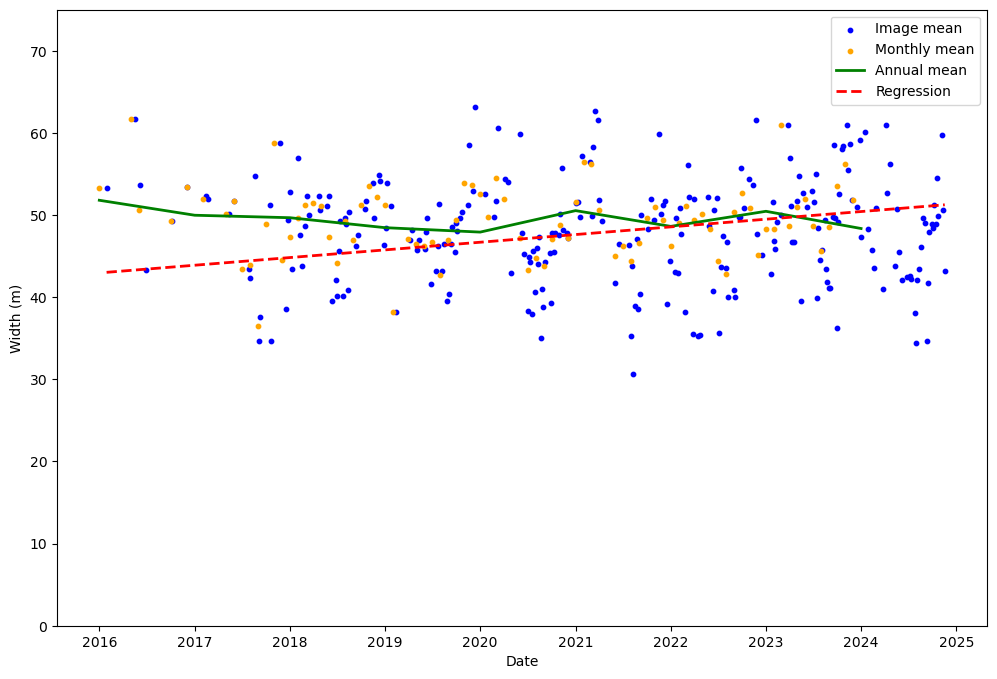

In [134]:
fig, ax0 = plt.subplots(figsize=(12, 8))
ax0.scatter(pd.to_datetime(bulk_stats['datetime']), bulk_stats['wet_only_width_mean'], s=10, color='blue', label='Image mean')
ax0.scatter(smoothed_months['false_datetime'], smoothed_months['wet_only_width_mean'], s=10, color='orange', label='Monthly mean')
ax0.plot(year_width_stats['false_datetime'], year_width_stats['wet_only_width_mean'],  linewidth=2, color='green', label='Annual mean')
ax0.plot(width_reg['x'], width_reg['y'], color='red', linewidth=2, label='Regression', linestyle='dashed')
ax0.set_ylim(0, 75)
# ax0.set_xlim(pd.to_datetime('2015-11-01'), pd.to_datetime('2024-12-31'))
# ax0.set_title('Image mean and annual mean width')
ax0.set_ylabel('Width (m)')
ax0.set_xlabel('Date')
ax0.legend()
# ax.plot(year_width_stats['false_datetime'], year_width_stats['wet_only_width_median'])
# ax.plot(bulk_stats['datetime'], bulk_stats['wet_only_width_median'])

In [136]:
# iqr regression
x = (pd.to_datetime(bulk_stats['datetime'])).astype('int64')
y = (bulk_stats['wet_only_width_iqr'])
# x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())
y_pred = model.predict(x)
iqr_reg = pd.DataFrame({'x': pd.to_datetime(bulk_stats['datetime']), 'y': y_pred})
print(len(x))
print(len(y))
print(len(y_pred))

                            OLS Regression Results                            
Dep. Variable:     wet_only_width_iqr   R-squared:                      -0.011
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                nan
Time:                        19:21:42   Log-Likelihood:                -839.11
No. Observations:                 258   AIC:                             1680.
Df Residuals:                     257   BIC:                             1684.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
datetime    1.154e-17   2.41e-19     47.963      0.0

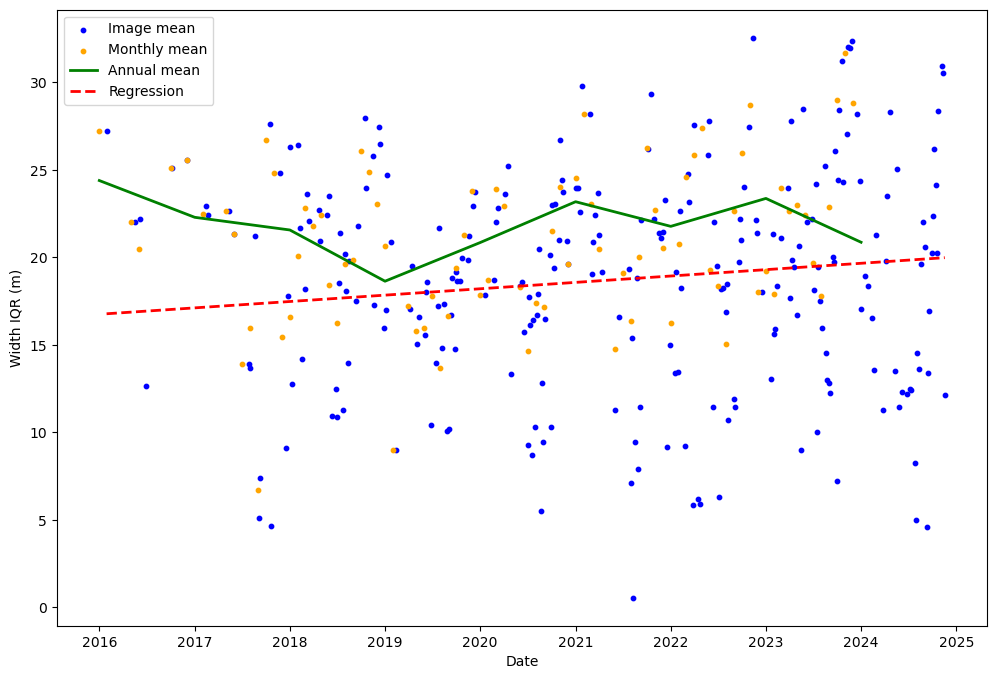

In [137]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pd.to_datetime(bulk_stats['datetime']), bulk_stats['wet_only_width_iqr'], 10, color='blue', label='Image mean')
ax.scatter(smoothed_months['false_datetime'], smoothed_months['wet_only_width_iqr'], 10, color='orange', label='Monthly mean')
ax.plot(year_width_stats['false_datetime'], year_width_stats['wet_only_width_iqr'],  linewidth=2, color='green', label='Annual mean')
ax.plot(iqr_reg['x'], iqr_reg['y'], linewidth=2, color='red', label='Regression', linestyle='dashed')
# ax.set_ylim(0, 75)
# ax.set_title('Image mean and annual mean IQR')
ax.set_ylabel('Width IQR (m)')
ax.set_xlabel('Date')
ax.legend()